In [1]:
# 1. Has the network latency gone up since we switched internet service providers?

# null hypothesis: There is no change in network latency since we switched internet providers
# alternate hypothesis: The network latency has gone up since we switched internet providers

# true positive: The network latency has increased since the switch to the new internet provider 
# true negative: The network latency has not increased since the switch to the new internet provider
# type I error: The network latency has not increased, however, the sample data suggests it has.
# type II error: The network latency has increased, however, the sample data suggests it did not.

In [2]:
# 2. Is the website redesign any good?
# Rewording: Is the website redesign has increased sales.

# null hypothesis: The website redesign did not increase sales.
# alternate hypothesis: The website redesign increased sales.

# true positive: The website redesign increased sales
# true negative: The website redesign did not increase sales.
# type 1 error: The website redesign did not increase sales, however, the sample data suggests it did.
# type 2 error: The website redesign increased sales, however, the sample data suggests it did not.


In [ ]:
# 3. Is our television ad driving more sales?

# null hypothesis: The television ad has not increased sales
# alternate hypothesis: The televesion ad has increased sales

# true positive: The televesion ad increased sales.
# true negative: The television ad did not increase sales.
# type 1 error: The television ad did not increase sales, however, the sample data suggests it did.
# type 2 error: The television ad increased sales, however, the sample data suggests it did not.


### Central Limit Theorem

- A population, that is not necessarily normally distributed.
- Taking samples, of sufficient size, will result in normally distributed sample means.

In [4]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
np.random.seed(123)

n_dice_per_experiment = ncols = 10
n_experiments = nrows = 100

data = np.random.randint(1,7, (nrows, ncols))

data[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [7]:
calculated_averages = data.mean(axis=1)
calculated_averages

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0.5, 1.0, 'Out come of averaging 10 dice rolls 100 times')

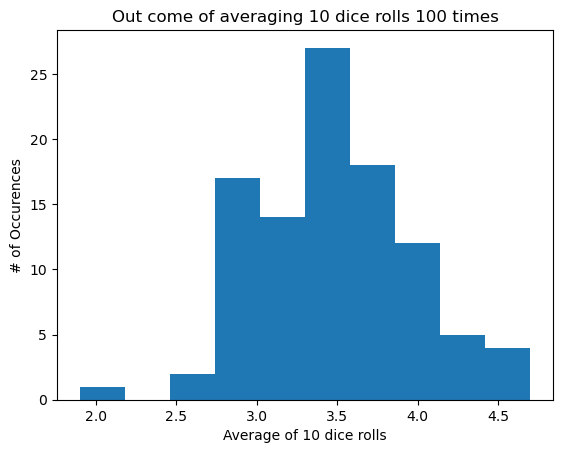

In [8]:
plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurences')

plt.title(f'Out come of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')

In [20]:
import env

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.hostname}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  

In [21]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

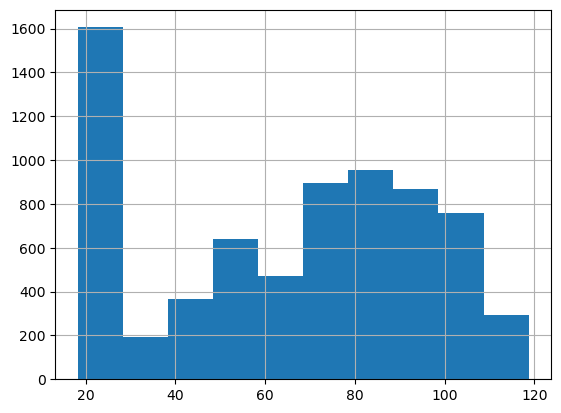

In [22]:
df.monthly_charges.hist()

<AxesSubplot:>

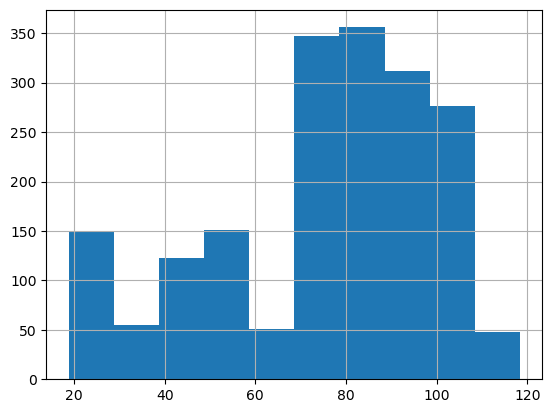

In [23]:
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()

## Set hypothesis

H_0: Mean of monthly charges of churned customers <= mean of monthly charges of all customers

H_a: Mean of monthly charges of churned customers > mean of monthly charges of all customers
    

In [29]:
## Set an alpha value

alpha = .05

In [25]:
## Verify an assumption of sample size

df['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

- Answer with the type of test you would use (assume normal distribution):

1. Is there a difference in grades of students on the second floor compared to grades of all students?
 - independent t-test (two sample t-test)

In [30]:
## Compute Test Statistic 


# Churned customer sample
churn_sample = df[df['churn'] == 'Yes']['monthly_charges']

# The overall mean
overall_mean = df['monthly_charges'].mean()


## The output of a 1 tail, 1 sample, t-test
# specified the sample
# specified the overall mean

# Assign the output to t (for the t-statistic) and p (the p-value)
t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

16.96540308050567 1.8703196496911995e-60 0.05


In [32]:
# is t > 0

t > 0

# is p/2 < alpha

p/2 < alpha

True

In [36]:
## The results based on t-statistic and p-value

if p/2 > alpha:
    print(f'We fail to reject null hypothesis')
elif t < 0:
    print(f'We fail to reject null hypothesis')
else:
    print('We reject null hypothesis')

We reject null hypothesis


## ANOVA - Analysis of Variance

Outcome: Compare means of groups A, B, and C
    
1. Plot distributions
2. Estabilsh hypothesis


## Format of Hypothesis

$H_0$ Null hypothesis = $\mu_{A} = \mu_{B} = \mu_{C}$

$H_a$ Alternate hypothesis = $\mu_{A} \neq \mu_{B} \neq \mu_{C}$

## Significant Level

alpha = .05

## Verify assumptions

- Normal distribution or at least 30 observations
- Indpendent variables
- Equal variances

### Syntax for test
```python
scipy.stats.f_oneway
```
Return: test statistitics and a p-value

In [203]:
### Load a dataset

df = sns.load_dataset('iris')

### Check sample size
df. species.value_counts()


# df.info()

# Independent - belong to one species
# Sample size - sufficient


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
# Group A - setosa
# Group B - versicolor
# Group C - virginica

In [204]:
# Statistical summary of sepal_length

df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [205]:
### Filter sepal_length by species

versicolor_sepal_length = df[df['species'] == 'versicolor']['sepal_length']
virginica_sepal_length = df[df['species'] == 'virginica']['sepal_length']
setosa_sepal_length = df[df['species'] == 'setosa']['sepal_length']



<AxesSubplot:>

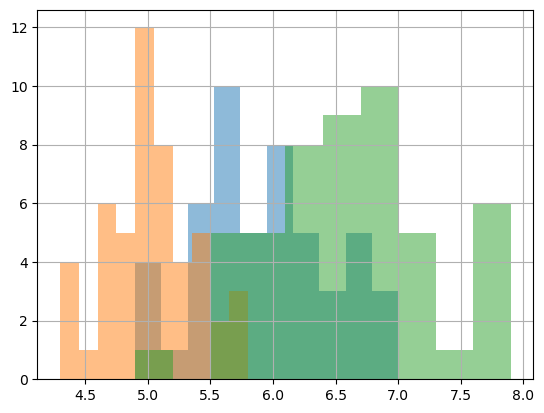

In [209]:
## Histograms

versicolor_sepal_length.hist(alpha = .5)
setosa_sepal_length.hist(alpha = .5)
virginica_sepal_length.hist(alpha = .5)

In [ ]:
### State hypotheses

H_0: For the mean of sepal_length - Versicolor = Virginica = Setosa
H_a: For the mean of sepal_length - Not all equal

In [213]:
# significance level

alpha = .05

# Independence? YES
# 30 observations
# Equal variance

Test for equal variance: Levene's Test

H_0: population variances of sepal length across all 3 species are equal
H_a: population variances of sepal lengths is different among at least 2 species

In [214]:
stats.levene(versicolor_sepal_length, setosa_sepal_length, virginica_sepal_length)

LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)

The p-value is < .05 therefore the variance of at least 2 of the groups are significantly different. In this case, it would not be recommended to run an ANOVA because assumptions are violated.
However, we will do it here to see what happens.
In practice, we would resort to a non-parametric version of our test, which in the case of ANOVA, would be Kruskal-Wallis Test.

In [215]:
stats.f_oneway(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)

F_onewayResult(statistic=119.26450218450472, pvalue=1.6696691907693648e-31)

In [216]:
stats.kruskal(versicolor_sepal_length, virginica_sepal_length, setosa_sepal_length)

KruskalResult(statistic=96.93743600064833, pvalue=8.91873433246198e-22)

Because variances were not equal, we would go with the result of th Kruskal-Wallis Test.
We still achieved significance here.

Our takeaway is that there appears to be a significant difference in sepal length across at least 2 of the groups.

In [217]:
print(versicolor_sepal_length.mean())
print(virginica_sepal_length.mean())
print(setosa_sepal_length.mean())

5.936
6.587999999999998
5.005999999999999


In [220]:
stats.ttest_ind(versicolor_sepal_length, virginica_sepal_length, equal_var=False)

Ttest_indResult(statistic=-5.629165259719801, pvalue=1.8661443873771226e-07)

In [221]:
stats.ttest_ind(versicolor_sepal_length, setosa_sepal_length, equal_var= False)

Ttest_indResult(statistic=10.52098626754911, pvalue=3.746742613983842e-17)

In comparing each group combination, we can see there is a significant difference in the Sepal Length of each species

In [224]:
import seaborn as sns
mpg = sns.load_dataset('mpg')


In [225]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [227]:
mpg = mpg[~mpg['horsepower'].isna()]
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [228]:
mpg['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

Is the horsepower of vehicles different across the disctinct origins of the vehicles?

$H_{0}$: mean_horsepower_USA = mean_horsepower_japan == mean_horsepower_europe 

$H_{a}$: mean horsepower form at least 2 countries are significantly different 

- Assumptions
1. At least 30 observations: met(see unique above)
2. Equal population variance across all 3 groups
3. Groups are independent of each other

<AxesSubplot:>

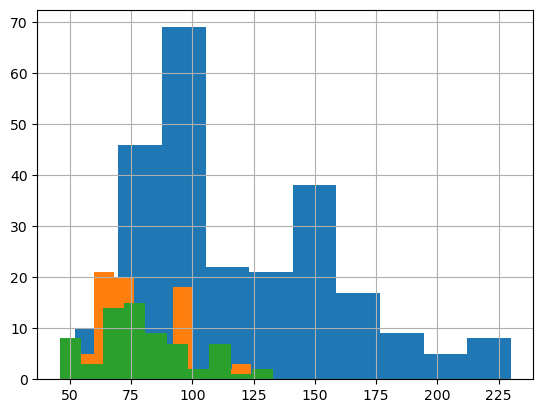

In [231]:
mpg[mpg['origin']=='usa'].horsepower.hist()
mpg[mpg['origin']=='japan'].horsepower.hist()
mpg[mpg['origin']=='europe'].horsepower.hist()

In [232]:
usa = mpg[mpg['origin']=='usa'].horsepower
japan = mpg[mpg['origin']=='japan'].horsepower
europe = mpg[mpg['origin']=='europe'].horsepower

In [233]:
# validate variance assumption

stats.levene(usa, japan, europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

With a low p-value, we can assume the variances of the countries horsepower is significantly different across at least two of the countries
With this information, we should not use the ANOVA test but should instead use the Krukal-Wallis Test

In [236]:
t, p = stats.kruskal(usa, japan, europe)
p

1.1759521262123952e-23

With a p-value < .05 (alpha), we can say there exists a significant difference between the horsepower of vehicles in at least 2 of the countries. But which 2?

Compare 2 groups, usa and japan

H_0: hp_usa == hp_japan

h_a: hp_usa != hp_japan

In [244]:
# compare 2 groups to see if there is significance

t, p = stats.ttest_ind(usa, japan, equal_var=False)

if p < .05:
    print(f'There is a significant difference between the horsepower of vehicles in the USA vs Japan. (p-value: {p})')
else:
    print('We fail to find a signifcant difference')

There is a significant difference between the horsepower of vehicles in the USA vs Japan. (p-value: 1.5146320352820458e-27)


In [245]:
# compare 2 groups to see if there is significance

t, p = stats.ttest_ind(usa, europe, equal_var=False)

if p < .05:
    print(f'There is a significant difference between the horsepower of vehicles in the USA vs Europe. (p-value: {p})')
else:
    print('We fail to find a signifcant difference')

There is a significant difference between the horsepower of vehicles in the USA vs Europe. (p-value: 2.1065705369888018e-22)


In [247]:
# compare 2 groups to see if there is significance

t, p = stats.ttest_ind(japan, europe, equal_var=False)

if p < .05:
    print(f'There is a significant difference between the horsepower of vehicles in the Europe vs Japan. (p-value: {p})')
else:
    print(f'We fail to find a signifcant difference. (p-value: {p})')

We fail to find a signifcant difference. (p-value: 0.8193616065509621)


2. Are adults who drink milk taller than adults who dont drink milk?
 - independent t-test (two sample t-test)

3. Is the the price of gas higher in texas or in new mexico?
 - indepndent t-test (two sample t-test)

4. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
 - ANOVA

#### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

(array([1., 3., 4., 2., 7., 6., 7., 4., 5., 1.]),
 array([ 39.44196825,  49.22654582,  59.0111234 ,  68.79570098,
         78.58027855,  88.36485613,  98.14943371, 107.93401128,
        117.71858886, 127.50316643, 137.28774401]),
 <BarContainer object of 10 artists>)

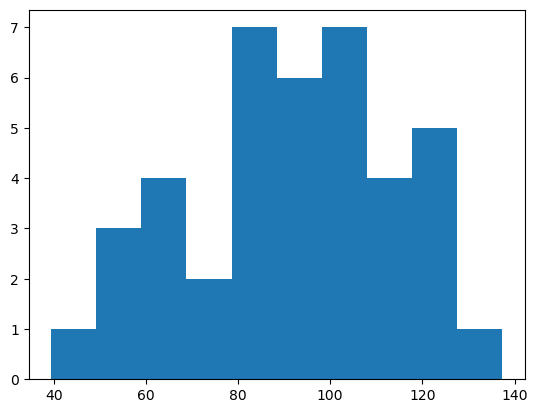

In [39]:
# Null Hypothesis: There is no significance betwen office 1 and office 2.
# Alternate hypothesis: Office 1 takes less time to sell homes than office 2.
# Alternate hypothesis: Office 2 takes less time to sell homes than office 1.

alpha = .05
off_1_mean = 90
off_1_sd = 15

off_2_mean = 100
off_2_sd = 20

off_1 = stats.norm(off_1_mean, off_2_sd).rvs(40)
plt.hist(off_1)

(array([4., 3., 5., 9., 7., 8., 7., 4., 1., 2.]),
 array([ 60.01456088,  68.49336408,  76.97216728,  85.45097047,
         93.92977367, 102.40857687, 110.88738007, 119.36618326,
        127.84498646, 136.32378966, 144.80259285]),
 <BarContainer object of 10 artists>)

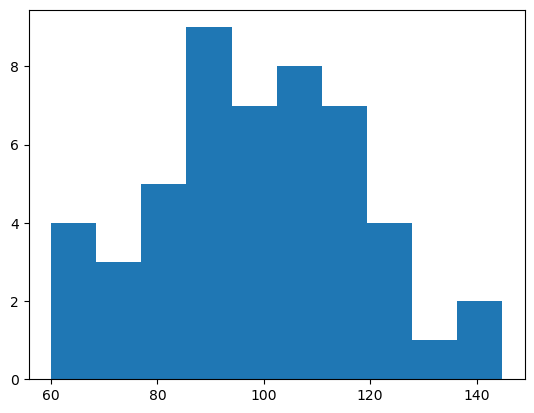

In [41]:
off_2 = stats.norm(off_2_mean, off_2_sd).rvs(50)
plt.hist(off_2)

In [42]:
print(off_1.var())
print(off_2.var())

532.768273964008
376.87239148692873


In [45]:
t, p = stats.ttest_ind(off_1, off_2, equal_var=False)
t, p/2

(-1.5310380227865514, 0.06495378900797005)

In [48]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We fail to reject $H_{0}$


In [47]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


is p/2 < alpha?  False
is t > 0?  False


In [49]:
print("Reject $H_{0}$? ", p < alpha)


Reject $H_{0}$?  False


In [50]:
print("Is t < 0? ", t < 0)

print("is p/2 < alpha? ", p / 2 < alpha)


Is t < 0?  True
is p/2 < alpha?  False


In [ ]:
# 1. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
# Null hypothesis: Mean of fuel-efficiency of 2008 cars <= Mean of fuel-efficiency of 1999 cars.
# Alternate Hypothesis: Mean of fuel-efficiency of 2008 cars > Mean of fuel-efficiency of 1999 cars.

In [248]:
from pydataset import data

mpg = data('mpg')
mpg = pd.DataFrame(mpg)
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [249]:
mpg['avg_mileage'] = (mpg['cty'] + mpg['hwy']) / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [250]:
cars_08_mileage = mpg[mpg['year'] == 2008]['avg_mileage']
cars_99_mileage = mpg[mpg['year'] == 1999]['avg_mileage']

cars_08_mileage.describe()

count    117.000000
mean      20.076923
std        4.908918
min       10.500000
25%       16.000000
50%       20.500000
75%       23.500000
max       32.500000
Name: avg_mileage, dtype: float64

In [251]:
mean_08 = cars_08_mileage.mean()
sd_08 = cars_08_mileage.std()

In [252]:
cars_99_mileage.describe()

count    117.000000
mean      20.222222
std        5.207937
min       13.000000
25%       15.500000
50%       21.000000
75%       22.500000
max       39.500000
Name: avg_mileage, dtype: float64

In [253]:
mean_99 = cars_99_mileage.mean()
sd_99 = cars_99_mileage.std()

(array([ 1.,  3.,  5., 16., 25., 29., 20., 10.,  5.,  3.]),
 array([ 4.26673738,  7.15471226, 10.04268713, 12.93066201, 15.81863689,
        18.70661176, 21.59458664, 24.48256152, 27.37053639, 30.25851127,
        33.14648615]),
 <BarContainer object of 10 artists>)

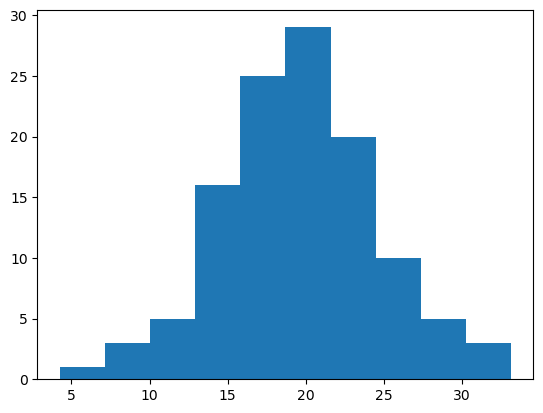

In [254]:
cars_08 = stats.norm(mean_08, sd_08).rvs(117)
cars_99 = stats.norm(mean_99, sd_99).rvs(117)
plt.hist(cars_08)

(array([ 5., 11., 13., 18., 16., 20., 14., 10.,  7.,  3.]),
 array([10.08027482, 12.32694256, 14.57361029, 16.82027803, 19.06694577,
        21.31361351, 23.56028124, 25.80694898, 28.05361672, 30.30028446,
        32.54695219]),
 <BarContainer object of 10 artists>)

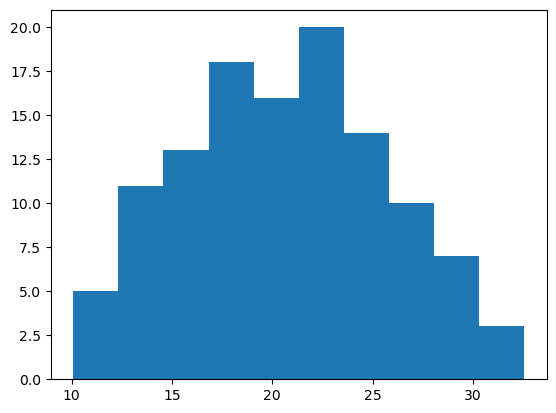

In [255]:
plt.hist(cars_99)

In [256]:
print(cars_08.var())
print(cars_99.var())

25.94887648658793
25.38207043231648


In [257]:
t, p = stats.ttest_ind(cars_08, cars_99)
t, p/2

(-1.6056749179255165, 0.05485280978198175)

In [258]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)


is p/2 < alpha?  False
is t > 0?  False


In [259]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [260]:
# Null hypothesis: Mean of fuel-efficiency of 2008 cars = Mean of fuel-efficiency of 1999 cars.
# Alternate Hypothesis: Mean of fuel-efficiency of 2008 cars != Mean of fuel-efficiency of 1999 cars.

In [261]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  False


In [262]:
# Null hypothesis: Mean of fuel-efficiency of 2008 cars >= Mean of fuel-efficiency of 1999 cars.
# Alternate Hypothesis: Mean of fuel-efficiency of 2008 cars < Mean of fuel-efficiency of 1999 cars.

In [263]:
# is t < 0? AND is p/2 < alpha?
if (p / 2 < alpha) & (t < 0):
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [264]:
# Are compact cars more fuel-efficient than the average car?


In [265]:
compact_mpg = mpg[mpg['class'] == 'compact']['avg_mileage']
compact_mpg.describe()

count    47.000000
mean     24.212766
std       3.527446
min      19.500000
25%      22.000000
50%      23.500000
75%      25.250000
max      38.500000
Name: avg_mileage, dtype: float64

In [266]:
comp_mean = compact_mpg.mean()
comp_sd = compact_mpg.std()

In [267]:
avg_mile_mean = mpg['avg_mileage'].mean()

In [268]:
comp = stats.norm(comp_mean, comp_sd).rvs(47)

(array([1., 5., 8., 9., 6., 8., 5., 3., 0., 2.]),
 array([17.37705649, 19.0395123 , 20.70196812, 22.36442394, 24.02687975,
        25.68933557, 27.35179139, 29.01424721, 30.67670302, 32.33915884,
        34.00161466]),
 <BarContainer object of 10 artists>)

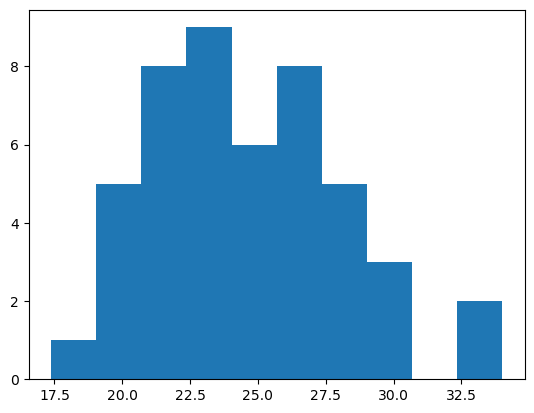

In [269]:
plt.hist(comp)

In [270]:
t, p = stats.ttest_1samp(comp, avg_mile_mean)
t, p/2


(8.336794170022308, 4.737220528832632e-11)

In [271]:
# Null Hypothesis: The average mileage for compact cars <= the average mileage of the average car
# Alternate Hypothesis: The average mileage for compact cars > the average mileage of the average car

In [272]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [273]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [274]:
# Null Hypothesis: The average mileage for compact cars = the average mileage of the average car
# Alternate Hypothesis: The average mileage for compact cars != the average mileage of the average car

In [275]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  True


In [276]:
# Null Hypothesis: The average mileage for compact cars >= the average mileage of the average car
# Alternate Hypothesis: The average mileage for compact cars < the average mileage of the average car

In [277]:
# is t < 0? AND is p/2 < alpha?
if (p / 2 < alpha) & (t < 0):
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [278]:
# Do manual cars get better gas mileage than automatic cars?

In [279]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [280]:
manual_mpg = mpg[mpg['trans'].str.contains('manual')]['avg_mileage']
manual_mpg.describe()

count    77.000000
mean     22.227273
std       5.160927
min      10.500000
25%      19.500000
50%      22.000000
75%      25.000000
max      39.500000
Name: avg_mileage, dtype: float64

In [281]:
auto_mpg = mpg[mpg['trans'].str.contains('auto')]['avg_mileage']
auto_mpg.describe()

count    157.000000
mean      19.130573
std        4.684312
min       10.500000
25%       15.000000
50%       19.000000
75%       22.500000
max       35.000000
Name: avg_mileage, dtype: float64

In [282]:
manual_mean = manual_mpg.mean()
manual_sd = manual_mpg.std()

In [283]:
auto_mean = auto_mpg.mean()
auto_sd = auto_mpg.std()

In [284]:
manual = stats.norm(manual_mean, manual_sd).rvs(77)
auto = stats.norm(auto_mean, auto_sd).rvs(157)

(array([ 4.,  7.,  7.,  8., 13., 11., 11.,  5.,  8.,  3.]),
 array([ 9.27203502, 11.68018673, 14.08833844, 16.49649015, 18.90464186,
        21.31279357, 23.72094528, 26.12909699, 28.5372487 , 30.94540041,
        33.35355212]),
 <BarContainer object of 10 artists>)

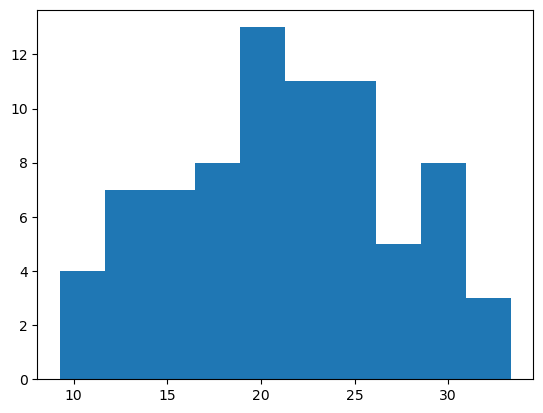

In [285]:
plt.hist(manual)

(array([ 3.,  8., 14., 24., 31., 24., 29., 16.,  7.,  1.]),
 array([ 7.47326492,  9.88938151, 12.30549811, 14.7216147 , 17.13773129,
        19.55384789, 21.96996448, 24.38608108, 26.80219767, 29.21831426,
        31.63443086]),
 <BarContainer object of 10 artists>)

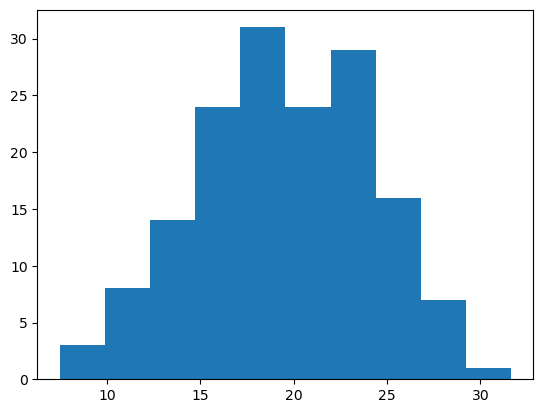

In [286]:
plt.hist(auto)

In [287]:
print(manual.var())
print(auto.var())

35.01008592088016
21.423591023761848


In [288]:
t, p = stats.ttest_ind(manual, auto, equal_var=False)
t, p/2

(2.215073973959316, 0.014299937978827457)

In [289]:
# Null Hypothesis: Average mileage of manual cars <= average mileage of automatic cars
# Alternate Hypothesis: Average mileage of manual cars > average mileage of automatic cars

In [290]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")



We reject $H_{0}$


In [291]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [292]:
# Null Hypothesis: Average mileage of manual cars = average mileage of automatic cars
# Alternate Hypothesis: Average mileage of manual cars != average mileage of automatic cars

In [293]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  True


In [294]:
# Null Hypothesis: Average mileage of manual cars >= average mileage of automatic cars
# Alternate Hypothesis: Average mileage of manual cars < average mileage of automatic cars

In [295]:
# is t < 0? AND is p/2 < alpha?
if (p / 2 < alpha) & (t < 0):
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$
